## 1. Import libraries, test data

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## 2. Training the Linear and Polynomial Regression model

From the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/preprocessing.html?highlight=polynomialfeatures#generating-polynomial-features), it generates `X^0 + X^1 + X^2 + X^3 + X^4` (includes power of `0` since `include_bias=True` by default) and includes it into the [`LinearRegression`](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) model. 

_The intercept is not required for the linear model since the intercept is generated from the polynomial coefficients_.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linear_model = LinearRegression()
linear_model.fit(x, y)

poly_features = PolynomialFeatures(degree=4)
poly_model = LinearRegression(fit_intercept=False)
poly_x = poly_features.fit_transform(x)
poly_model.fit(poly_x, y)

LinearRegression(fit_intercept=False)

## 4. Generate interpolation expected prediction values

The interpolated x-points should be the mean of the 2 points, and we assume (and expect) their respective y-values to be the mean of the 2 points y-values.

In [3]:
x_test = []
y_test = []

for i in range(0, len(x) - 1):
    x_test.append(((x[i] + x[i + 1]) / 2).tolist())
    y_test.append((y[i] + y[i + 1]) / 2)

## 5. Display graph and details

The red data points are the interpolated x-points, and the blue data points are the actual x-points with the true y-value.

See the difference between the linear and polynomial predictions.

Remember the matrix equation where `y = b * X`. Each `b * X` should result in the `y` matrix (same as the list).

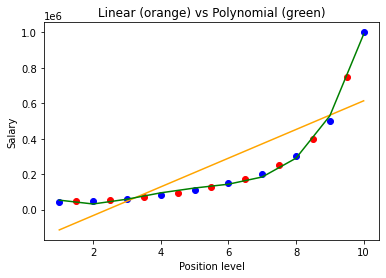

b matrix:
                0
0  184166.666667
1 -211002.331002
2   94765.442890
3  -15463.286713
4     890.151515 

X matrix:

      0     1      2       3        4
0  1.0   1.0    1.0     1.0      1.0
1  1.0   2.0    4.0     8.0     16.0
2  1.0   3.0    9.0    27.0     81.0
3  1.0   4.0   16.0    64.0    256.0
4  1.0   5.0   25.0   125.0    625.0
5  1.0   6.0   36.0   216.0   1296.0
6  1.0   7.0   49.0   343.0   2401.0
7  1.0   8.0   64.0   512.0   4096.0
8  1.0   9.0   81.0   729.0   6561.0
9  1.0  10.0  100.0  1000.0  10000.0


In [4]:
import matplotlib.pyplot as plt
from itertools import zip_longest, chain

plt.scatter(x, y, color = 'blue')
plt.scatter(x_test, y_test, color='red')
plt.plot(x, linear_model.predict(x), color = 'orange')
plt.plot(x, poly_model.predict(poly_features.fit_transform(x)), color = 'green')
plt.title('Linear (orange) vs Polynomial (green)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

print('b matrix:\n', pd.DataFrame(poly_model.coef_), '\n')
print('X matrix:\n\n', pd.DataFrame(poly_x))

## 4. Find errors in predicted interpolated data

Display the predicted y-value from interpolated x-points against the existing true x-points.

In [5]:
y_pred = poly_model.predict(poly_features.fit_transform(x_test))

df = pd.DataFrame(chain(
        zip_longest(x_test, y_test, y_pred, map(lambda _: 0, x_test)), 
        zip_longest(x, y, y, map(lambda _: 1, x))
    ), columns=['x-values', 'y-value', 'y-predicted-value', 'y-value-is-true'])
df['residual-epsilon'] = df['y-value'] - df['y-predicted-value']
df.sort_values('x-values')

,x-values,y-value,y-predicted-value,y-value-is-true,residual-epsilon
9,[1],45000.0,45000.000000,1,0.000000
0,[1.5],47500.0,33203.216055,0,14296.783945
10,[2],50000.0,50000.000000,1,0.000000
1,[2.5],55000.0,42102.545891,0,12897.454109
11,[3],60000.0,60000.000000,1,0.000000
2,[3.5],70000.0,77125.127477,0,-7125.127477
12,[4],80000.0,80000.000000,1,0.000000
3,[4.5],95000.0,109582.149621,0,-14582.149621
13,[5],110000.0,110000.000000,1,0.000000
4,[5.5],130000.0,132148.437500,0,-2148.437500
